# Aotizhoxing Station Air Quality Dataset Wrangling

In this notebook i will do some data cleaning and transformation for Aotizhoxing Station Air Quality Dataset to get a clean dataset, and also do some exploration of the dataset to get a few insights. These process are the first step before i visualize the data in Power BI.

The Dataset is available on UCI Machine Learning Website and can be accessed in [this link](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data). But in this notebook i get the dataset from someone's GitHub repository that already has the dataset.

> Tambahkan blockquote



The dataset contains 12 datasets, where each of them are data records from 12 station in Beijing. But in this notebook i only use one dataset, the Aotizhoxing Station Air Quality Dataset.

## Import All We Need

### Import Library

Import all libraries that are needed, such as pandas, matplotlib, and numpy.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
!pip install windrose
from windrose import WindroseAxes
import seaborn as sns

### Import Dataset

Next Step is import the Dataset, but first i need to clone the repo to get access to the data.

In [2]:
# Clone the repo
!git clone https://github.com/marceloreis/HTI.git

Cloning into 'HTI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 11), reused 24 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 10.22 MiB | 19.56 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
# Read the csv file to get the dataframe
aotizhongxin_df = pd.read_csv("/content/HTI/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**FEATURES DESCRIPTION**

From the sample above, we can see that the dataset contains 18 features. Here are the description for every feature.  


1. **No** - Serial number or index for the dataset entries.
2. **year** - The year in which the observation was recorded.
3. **month** - The month of the observation (1-12).
4. **day** - The day of the month when the data was recorded.
5. **hour** - The hour of the day when the observation was taken (0-23).
6. **PM2.5** - Concentration of **particulate matter (PM2.5)** in micrograms per cubic meter (µg/m³). PM2.5 are fine particles that pose health risks when inhaled.
7. **PM10** - Concentration of **particulate matter (PM10)** in µg/m³. PM10 includes coarse particles that can affect respiratory health.
8. **SO2 (Sulfur Dioxide)** - Measured in µg/m³, SO2 is a harmful gas primarily produced by burning fossil fuels.
9. **NO2 (Nitrogen Dioxide)** - Measured in µg/m³, NO2 is a toxic gas that contributes to air pollution and respiratory diseases.
10. **CO (Carbon Monoxide)** - Measured in µg/m³, CO is a colorless, odorless gas produced by combustion processes.
11. **O3 (Ozone)** - Measured in µg/m³, ozone is a key component of smog and can cause respiratory problems.
12. **TEMP (Temperature)** - Air temperature in degrees Celsius (°C).
13. **PRES (Pressure)** - Atmospheric pressure in hPa (hectopascals).
14. **DEWP (Dew Point Temperature)** - The temperature at which air becomes saturated with moisture and dew forms (°C).
15. **RAIN (Rainfall)** - Amount of precipitation recorded in millimeters (mm).
16. **wd (Wind Direction)** - The cardinal direction of the wind (e.g., N, NE, S, SW).
17. **WSPM (Wind Speed in Meters per Second)** - Wind speed recorded in m/s.
18. **station** - The specific air quality monitoring station where the data was collected.

To measure the Air Quality Index, there are 6 pollutants as the indicator of the air quality, which are in this dataset interprated as those 6 featrues:
1. **PM2.5** - Concentration of **particulate matter (PM2.5)** in micrograms per cubic meter (µg/m³). PM2.5 are fine particles that pose health risks when inhaled.
2. **PM10** - Concentration of **particulate matter (PM10)** in µg/m³. PM10 includes coarse particles that can affect respiratory health.
3. **SO2 (Sulfur Dioxide)** - Measured in µg/m³, SO2 is a harmful gas primarily produced by burning fossil fuels.
4. **NO2 (Nitrogen Dioxide)** - Measured in µg/m³, NO2 is a toxic gas that contributes to air pollution and respiratory diseases.
5. **CO (Carbon Monoxide)** - Measured in µg/m³, CO is a colorless, odorless gas produced by combustion processes.
6. **O3 (Ozone)** - Measured in µg/m³, ozone is a key component of smog and can cause respiratory problems.


## Cleaning & Transform Data

The dataset contains missing values and some features that has to be in one column (year, month, day and hour has to be in 1 column as datetime column) so we need to clean and transform the dataset to make it easier to analyze and visualize.

### Cleaning Missing Values

In [7]:
# Showing the sum of all features that has missing values
aotizhongxin_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [6]:
# Drop all rows that contain missing values
aotizhongxin_df.dropna(inplace=True)

### Transforming datetime column

In [8]:
# Create 'Date' column by joining 'year', 'month' and 'day' column using '/' separator
aotizhongxin_df['Date'] = aotizhongxin_df[['year', 'month', 'day']].astype(str).agg('/'.join, axis=1)

# Create 'Time' column by joining 'hour' column with ':00:00' format
aotizhongxin_df['Time'] = aotizhongxin_df['hour'].astype(str) + ":00:00"

# Create 'datetime' column by joining the 'Date' and 'Time' column
aotizhongxin_df['datetime'] = aotizhongxin_df['Date'] + " " + aotizhongxin_df['Time']

# Convert data type of 'datetime' column from string to datetime data type
aotizhongxin_df['datetime'] = pd.to_datetime(aotizhongxin_df['datetime'])

In [9]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31815 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        31815 non-null  int64         
 1   year      31815 non-null  int64         
 2   month     31815 non-null  int64         
 3   day       31815 non-null  int64         
 4   hour      31815 non-null  int64         
 5   PM2.5     31815 non-null  float64       
 6   PM10      31815 non-null  float64       
 7   SO2       31815 non-null  float64       
 8   NO2       31815 non-null  float64       
 9   CO        31815 non-null  float64       
 10  O3        31815 non-null  float64       
 11  TEMP      31815 non-null  float64       
 12  PRES      31815 non-null  float64       
 13  DEWP      31815 non-null  float64       
 14  RAIN      31815 non-null  float64       
 15  wd        31815 non-null  object        
 16  WSPM      31815 non-null  float64       
 17  station   31815 n

## Explore the dataset


### Check if there is any outlier in the dataframe

In [12]:
# Using methode .describe() to check the descriptive statistics paramaters
numeric_features = ['PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
aotizhongxin_df[numeric_features].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000
mean,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,1.720471
std,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,1.204240
min,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,0.900000
50%,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,1.400000
75%,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,2.200000
max,713.00000,948.000000,229.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,46.400000,11.200000


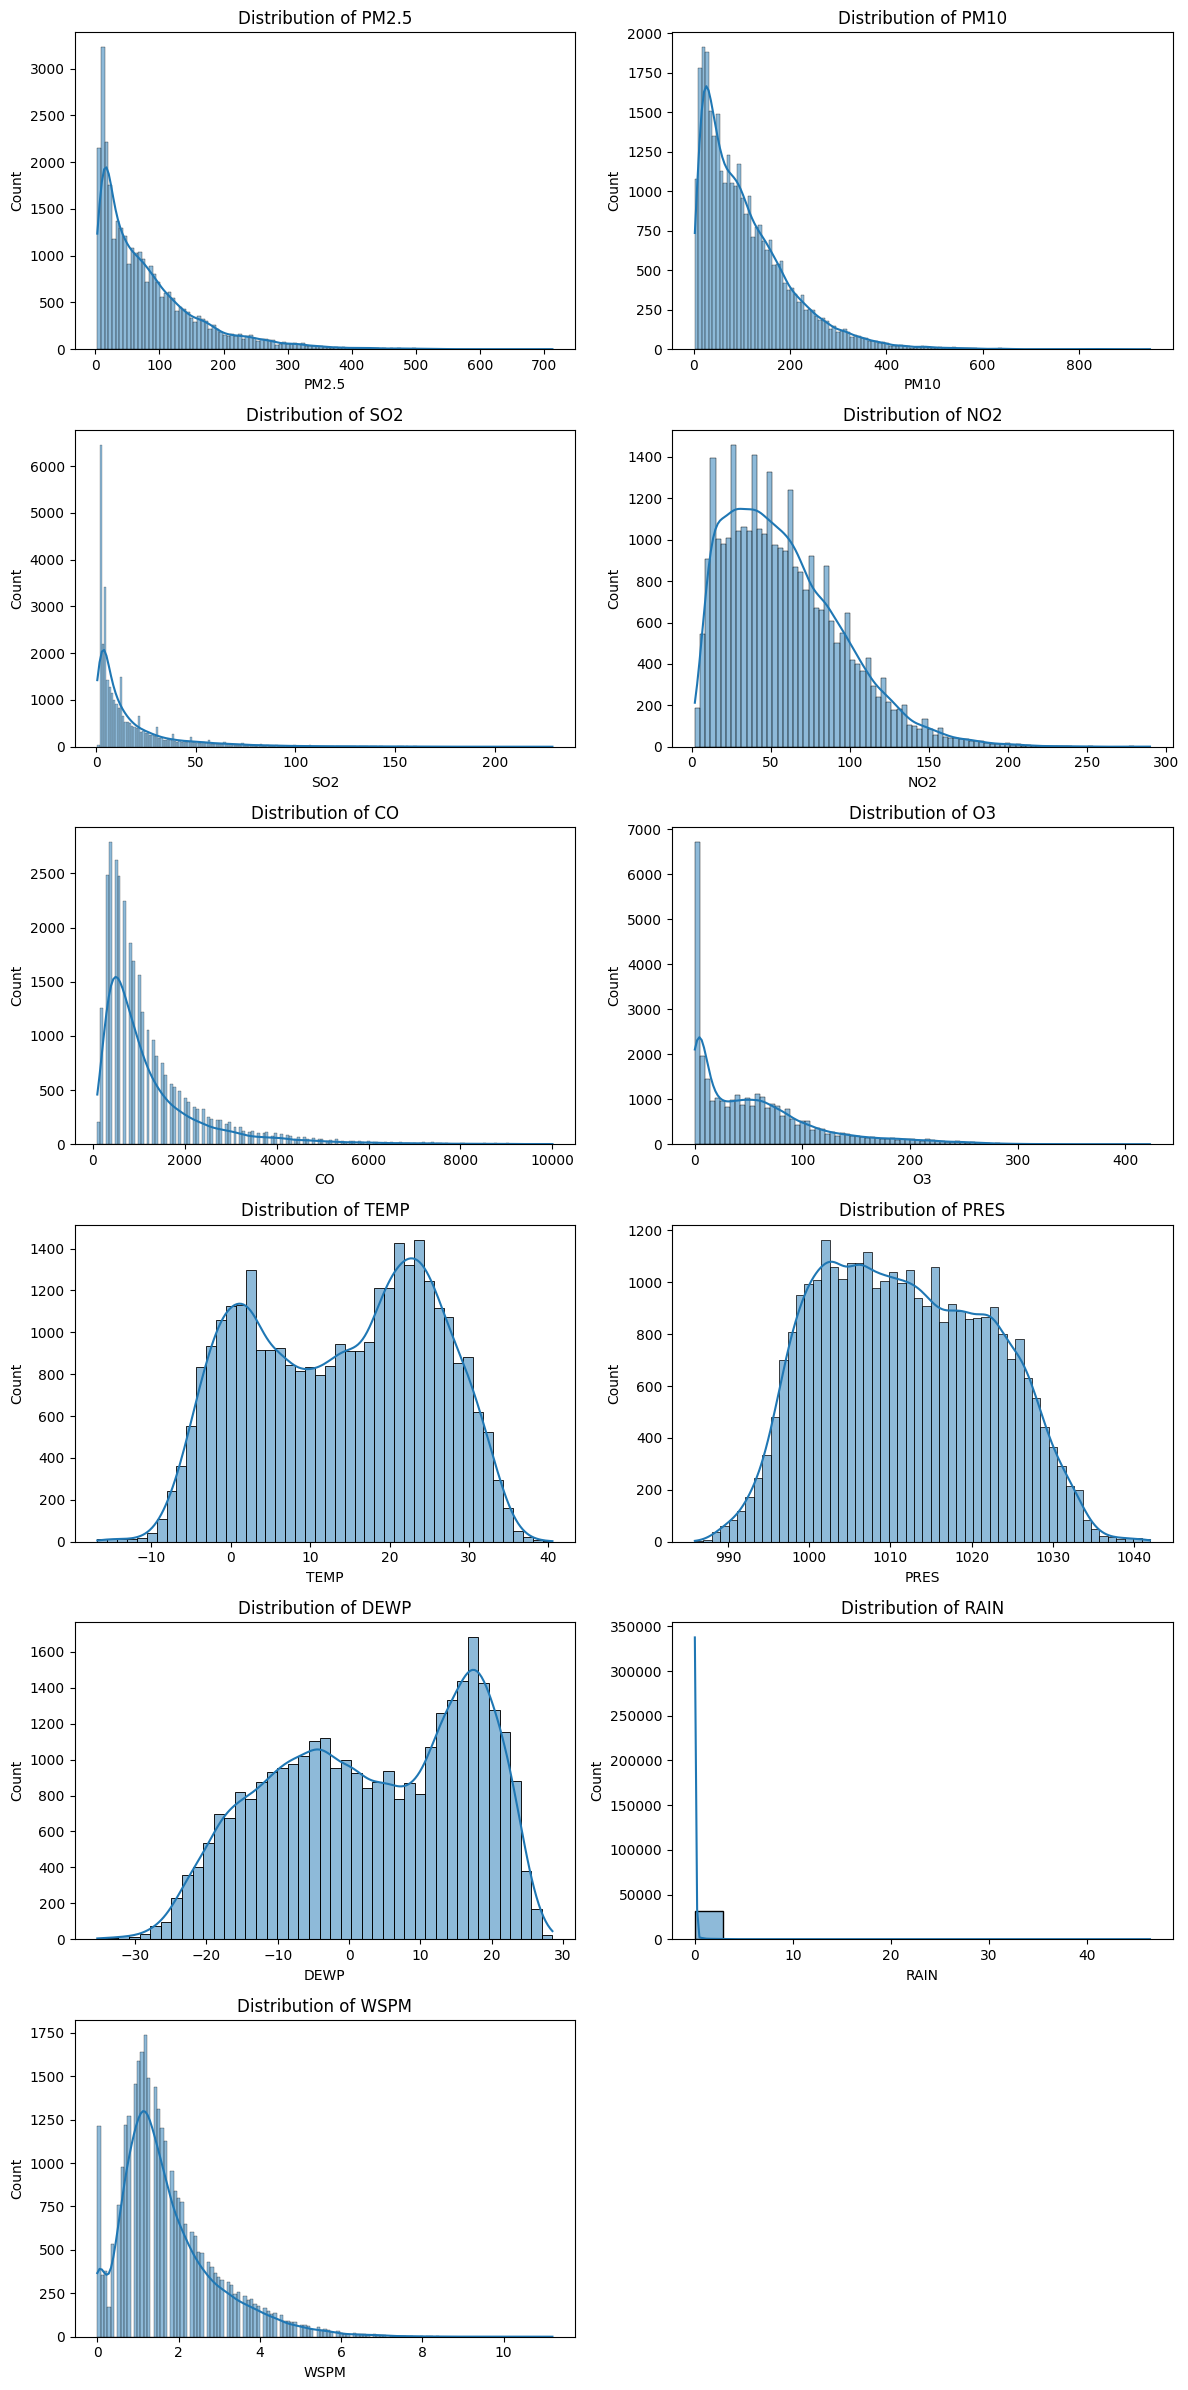

In [33]:
# Visualizeing features distribution

def plot_distributions(df):
    col_counts = len(df.columns)
    rows = math.ceil(col_counts / 2)  # Jumlah baris subplot

    fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows * 4))
    ax = ax.flatten()  # Flatten agar mudah diakses

    for i, col_name in enumerate(df.columns):
        sns.histplot(df[col_name].dropna(), kde=True, ax=ax[i])  # Histogram dengan KDE
        ax[i].set_title(f"Distribution of {col_name}")

    # Hapus subplot yang tidak terpakai
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    fig.tight_layout()
    plt.show()

plot_distributions(aotizhongxin_df[numeric_features])

It seems like the dataframe has no outlier because the highest values are still in the logical number of measuremnents.  


### Measuring AQI

Since the dataset only contains the concentration numbers of the pollutants, we need to measure teh Air Quality Index (AQI) using this formula:

$$
AQI = \frac{(I_{high} - I_{low})}{(C_{high} - C_{low})} \times (C - C_{low}) + I_{low}
$$

**Where:**

- **C** = Concentration of the pollutant
- **C\_high** = Upper bound of the concentration range that contains C
- **C\_low** = Lower bound of the concentration range that contains C
- **I\_high** = AQI value corresponding to **C\_high**
- **I\_low** = AQI value corresponding to **C\_low**

**Notes**

*   AQI is calculated for each pollutant separately, and the final AQI is the highest among them.
*   AQI values help in determining air pollution levels and health impacts.



We need breakpoints to measure AQI using this formula. We can get this breakpoints from EPA in [this link](https://aqs.epa.gov/aqsweb/documents/codetables/aqi_breakpoints.html).

There are 6 pollutants to measure the AQI, but in this notebook i will just using 4 pollutants (PM 2.5, PM 10, CO and NO2) and get the max  AQI value from fourth pollutants as the final AQI.

#### Preparing Breakpoints Dataset

Since we only want to measure 4 pollutants, we need to prepare the breakpoints dataset by breaking it into 4 dataframe contains each breakpoints for each pollutant.

In [45]:
# Read the csv file of breakpoints dataframe
aqi_breakpoints = pd.read_csv('/content/aqi_breakpoints.csv')
aqi_breakpoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parameter             77 non-null     object 
 1   Parameter Code        77 non-null     int64  
 2   Duration Code         77 non-null     object 
 3   Duration Description  77 non-null     object 
 4   AQI Category          77 non-null     object 
 5   Low AQI               77 non-null     int64  
 6   High AQI              77 non-null     int64  
 7   Low Breakpoint        77 non-null     float64
 8   High Breakpoint       77 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 5.5+ KB


In [47]:
# checking the value counts of 'Parameter' column
aqi_breakpoints['Parameter'].value_counts()

,count
Parameter,
PM2.5,7
CO,7
NO2,7
PM10,7


In [46]:
# Dropping unnecessary column
aqi_breakpoints.drop(aqi_breakpoints[aqi_breakpoints['Parameter'] == 'PM2.5 - Local Conditions'].index, inplace=True)
aqi_breakpoints.drop(aqi_breakpoints[aqi_breakpoints['Parameter'] == 'Ozone'].index, inplace=True)
aqi_breakpoints.drop(aqi_breakpoints[aqi_breakpoints['Parameter'] == 'Sulfur dioxide'].index, inplace=True)
aqi_breakpoints.drop(aqi_breakpoints[aqi_breakpoints['Duration Code'] == 'X'].index, inplace=True)

# Changing the column names
aqi_breakpoints['Parameter'] = (aqi_breakpoints['Parameter']
                                .apply(
                                    lambda x:
                                    "PM2.5" if x == "Acceptable PM2.5 AQI & Speciation Mass"
                                    else "CO" if x ==  "Carbon monoxide"
                                    else "NO2" if x == "Nitrogen dioxide (NO2)"
                                    else "PM10"  ))

In [48]:
# Checking the result
aqi_breakpoints

,Parameter,Parameter Code,Duration Code,Duration Description,AQI Category,Low AQI,High AQI,Low Breakpoint,High Breakpoint
0,PM2.5,88502,7,24 HOUR,GOOD,0,50,0.0,9.0
1,PM2.5,88502,7,24 HOUR,MODERATE,51,100,9.1,35.4
2,PM2.5,88502,7,24 HOUR,UNHEALTHY FOR SENSITIVE,101,150,35.5,55.4
3,PM2.5,88502,7,24 HOUR,UNHEALTHY,151,200,55.5,125.4
4,PM2.5,88502,7,24 HOUR,VERY UNHEALTHY,201,300,125.5,225.4
5,PM2.5,88502,7,24 HOUR,HAZARDOUS,301,500,225.5,325.4
6,PM2.5,88502,7,24 HOUR,HAZARDOUS,501,999,325.5,99999.9
14,CO,42101,Z,8-HR RUN AVG END HOUR,GOOD,0,50,0.0,4.4
15,CO,42101,Z,8-HR RUN AVG END HOUR,MODERATE,51,100,4.5,9.4
16,CO,42101,Z,8-HR RUN AVG END HOUR,UNHEALTHY FOR SENSITIVE,101,150,9.5,12.4


In [49]:
# Breaking the breakpoints into 4 different dataframe
pm25_aqi_breakpoints = aqi_breakpoints[aqi_breakpoints['Parameter'] == 'PM2.5']
pm10_aqi_breakpoints = aqi_breakpoints[aqi_breakpoints['Parameter'] == 'PM10']
co_aqi_breakpoints = aqi_breakpoints[aqi_breakpoints['Parameter'] == 'CO']
no2_aqi_breakpoints = aqi_breakpoints[aqi_breakpoints['Parameter'] == 'NO2']

# Reset the Index and drop it
pm10_aqi_breakpoints.reset_index(inplace=True, drop=True)
pm25_aqi_breakpoints.reset_index(inplace=True, drop=True)
co_aqi_breakpoints.reset_index(inplace=True, drop=True)
no2_aqi_breakpoints.reset_index(inplace=True, drop=True)

#### Define & Apply Computation

Define computation function to measure the AQI

In [54]:
# Define the AQI formula function
def compute_aqi(breakpoint, concentration):
    for i in range(len(breakpoint)):
      # Checking if the concentration value is in the level range
      if breakpoint['Low Breakpoint'][i] <= concentration <= breakpoint['High Breakpoint'][i]:
        # If it is true, then get the value of breakpoints in this level
        i_low = breakpoint['Low AQI'][i]
        i_high = breakpoint['High AQI'][i]
        c_low = breakpoint['Low Breakpoint'][i]
        c_high = breakpoint['High Breakpoint'][i]
    # Measure the AQI
    aqi = ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
    return aqi


In [55]:
# Apply the computation function to the dataset by creating the new columns
aotizhongxin_df['AQI PM2.5'] = aotizhongxin_df['PM2.5'].apply(lambda x: compute_aqi(pm25_aqi_breakpoints, x))
aotizhongxin_df['AQI PM10'] = aotizhongxin_df['PM10'].apply(lambda x: compute_aqi(pm10_aqi_breakpoints, x))
aotizhongxin_df['AQI CO'] = aotizhongxin_df['CO'].apply(lambda x: compute_aqi(co_aqi_breakpoints, x))
aotizhongxin_df['AQI NO2'] = aotizhongxin_df['NO2'].apply(lambda x: compute_aqi(no2_aqi_breakpoints, x))

In [56]:
# Checking the result
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd,WSPM,station,Date,Time,datetime,AQI PM2.5,AQI PM10,AQI CO,AQI NO2
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,NNW,4.4,Aotizhongxin,2013/3/1,0:00:00,2013-03-01 00:00:00,22.222222,3.703704,502.243636,6.603774
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,N,4.7,Aotizhongxin,2013/3/1,1:00:00,2013-03-01 01:00:00,44.444444,7.407407,502.243636,6.603774
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,NNW,5.6,Aotizhongxin,2013/3/1,2:00:00,2013-03-01 02:00:00,38.888889,6.481481,502.243636,9.433962
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,NW,3.1,Aotizhongxin,2013/3/1,3:00:00,2013-03-01 03:00:00,33.333333,5.555556,502.243636,10.377358
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,N,2.0,Aotizhongxin,2013/3/1,4:00:00,2013-03-01 04:00:00,16.666667,2.777778,502.243636,11.320755


In [57]:
aotizhongxin_df[['CO','AQI CO']].describe()

,CO,AQI CO
count,31815.000000,31815.000000
mean,1256.574729,507.009785
std,1223.301208,6.095118
min,100.000000,501.247133
25%,500.000000,503.240139
50%,800.000000,504.734894
75%,1500.000000,508.222655
max,10000.000000,550.574043


In [59]:
# Creating the final AQI value from the maximum AQI value in the four AQI values of pollutants
aotizhongxin_df['AQI'] = aotizhongxin_df[['AQI PM2.5', 'AQI PM10', 'AQI CO', 'AQI NO2']].max(axis=1)

### Transform Wind Direction data

To make it easier to visualize the wind direction data, we need to transform it to number since the data type before is string, we need to convert it into degrees (float numbers).

We transform it using direction map where every letters of wind direction has its  number of degrees.

In [60]:
direction_map = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
                 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
                 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
                 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}

In [61]:
# Creating the 'wd_degree' column
aotizhongxin_df['wd_degree'] = aotizhongxin_df['wd'].map(direction_map)

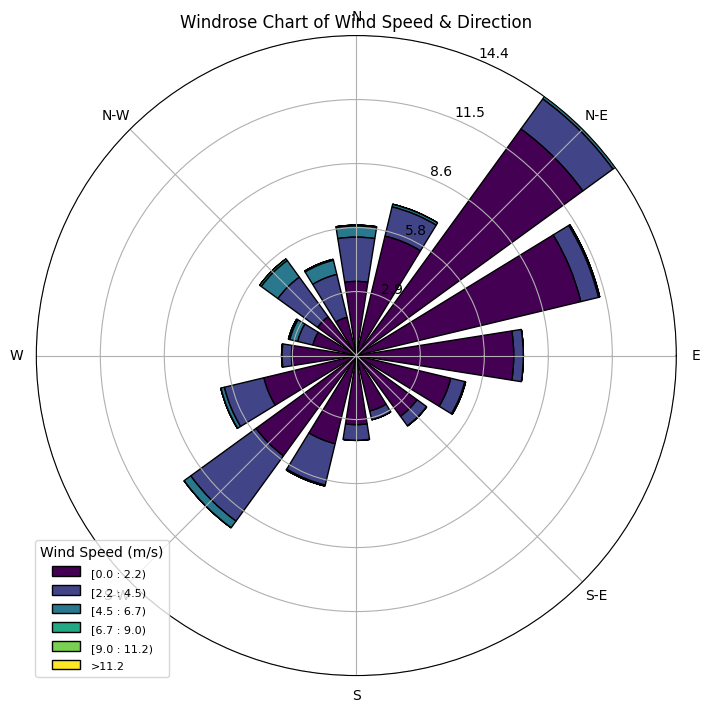

In [63]:
# Try to visualize the wind direction data

fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

# INput the data to Windrose
ax.bar(aotizhongxin_df['wd_degree'], aotizhongxin_df['WSPM'], normed=True, opening=0.8, edgecolor='black')

# Add label
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Windrose Chart of Wind Speed & Direction")

plt.show()

## Finishing

After we clean missing values and transform some features, the last but not least is dropping the columns that we don't need anymore such us year, month, day and hour that has been merged in one column datetime.

In [64]:
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,station,Date,Time,datetime,AQI PM2.5,AQI PM10,AQI CO,AQI NO2,AQI,wd_degree
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,Aotizhongxin,2013/3/1,0:00:00,2013-03-01 00:00:00,22.222222,3.703704,502.243636,6.603774,502.243636,337.5
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,Aotizhongxin,2013/3/1,1:00:00,2013-03-01 01:00:00,44.444444,7.407407,502.243636,6.603774,502.243636,0.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,Aotizhongxin,2013/3/1,2:00:00,2013-03-01 02:00:00,38.888889,6.481481,502.243636,9.433962,502.243636,337.5
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,Aotizhongxin,2013/3/1,3:00:00,2013-03-01 03:00:00,33.333333,5.555556,502.243636,10.377358,502.243636,315.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,Aotizhongxin,2013/3/1,4:00:00,2013-03-01 04:00:00,16.666667,2.777778,502.243636,11.320755,502.243636,0.0


In [66]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31815 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   PM2.5      31815 non-null  float64       
 1   PM10       31815 non-null  float64       
 2   NO2        31815 non-null  float64       
 3   CO         31815 non-null  float64       
 4   TEMP       31815 non-null  float64       
 5   PRES       31815 non-null  float64       
 6   DEWP       31815 non-null  float64       
 7   RAIN       31815 non-null  float64       
 8   WSPM       31815 non-null  float64       
 9   station    31815 non-null  object        
 10  datetime   31815 non-null  datetime64[ns]
 11  AQI PM2.5  31815 non-null  float64       
 12  AQI PM10   31815 non-null  float64       
 13  AQI CO     31815 non-null  float64       
 14  AQI NO2    31815 non-null  float64       
 15  AQI        31815 non-null  float64       
 16  wd_degree  31815 non-null  float64       
dty

In [65]:
# Dropping unnecessary columns
aotizhongxin_df.drop(columns=['No', 'year', 'month', 'day', 'hour', 'wd', 'Date', 'Time', 'O3', 'SO2' ], inplace=True)

In [ ]:
# Save the dataset into a file
aotizhongxin_df.to_excel('Aotizhongxin Air Quality Dataset Clean.xlsx', index=False)